## title을 기준으로 장르와 장르 간의 유사성 보기

In [1]:
import pandas as pd
import numpy as np
import json
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
# pd.options.plotting.backend = 'plotly'
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [45]:
rating = pd.read_csv("../data/train/train_ratings.csv")

In [46]:
title = pd.read_csv("../data/train/titles.tsv",sep='\t')

In [47]:
genre = pd.read_csv("../data/train/genres.tsv", sep='\t')
director = pd.read_csv("../data/train/directors.tsv",sep='\t')

In [52]:
tmp = genre.groupby("item")["genre"].apply(lambda x:"_".join(sorted(list(set(x))))).reset_index()

In [62]:
dir_tmp = director.groupby("item")["director"].apply(lambda x:"_".join(sorted(list(set(x))))).reset_index()

In [63]:
df = pd.merge(pd.merge(rating, dir_tmp, how="left", on="item"), tmp, how="left", on="item")

In [65]:
df

,user,item,time,director,genre
0,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
1,11,170,1230782534,nm0812200,Action_Adventure_Crime_Thriller
2,11,531,1230782539,nm0002140,Children_Drama
3,11,616,1230782542,nm0718627,Animation_Children
4,11,2140,1230782563,nm0000568_nm0001345,Adventure_Fantasy
...,...,...,...,...,...
5154466,138493,44022,1260209449,nm0757858,Adventure_Animation_Children_Comedy
5154467,138493,4958,1260209482,nm0601382,Action_Drama_War
5154468,138493,68319,1260209720,nm0004303,Action_Sci-Fi_Thriller
5154469,138493,40819,1260209726,nm0003506,Drama_Musical_Romance


In [66]:
rating

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [67]:
df["director"].isna().sum()

301445

In [68]:
df.isna().sum()

user             0
item             0
time             0
director    301445
genre            0
dtype: int64

In [69]:
301445/5154471

0.058482238041498345

In [73]:
df.fillna("nm0000000", inplace=True)

In [74]:
df.isna().sum()

user        0
item        0
time        0
director    0
genre       0
dtype: int64

In [75]:
df[df.director == "nm0000000"]

,user,item,time,director,genre
10,11,1591,1230782724,nm0000000,Action_Adventure_Sci-Fi_Thriller
51,11,2793,1230784958,nm0000000,Comedy_Horror_Romance_Thriller
52,11,33085,1230785024,nm0000000,Horror_Thriller
62,11,31184,1230785400,nm0000000,Action_Animation_Fantasy_Sci-Fi
63,11,34338,1230785494,nm0000000,Comedy_Documentary
...,...,...,...,...,...
5154413,138493,8604,1257785495,nm0000000,Action_Comedy
5154447,138493,50601,1258390414,nm0000000,Adventure_Children_Fantasy
5154448,138493,224,1258390437,nm0000000,Comedy_Drama_Romance
5154455,138493,61160,1258390537,nm0000000,Action_Adventure_Animation_Sci-Fi


In [77]:
df.to_csv("gnn_dataset.csv", index=False)

In [78]:
tmp3 = pd.read_csv("gnn_dataset.csv")

In [79]:
tmp3

,user,item,time,director,genre
0,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
1,11,170,1230782534,nm0812200,Action_Adventure_Crime_Thriller
2,11,531,1230782539,nm0002140,Children_Drama
3,11,616,1230782542,nm0718627,Animation_Children
4,11,2140,1230782563,nm0000568_nm0001345,Adventure_Fantasy
...,...,...,...,...,...
5154466,138493,44022,1260209449,nm0757858,Adventure_Animation_Children_Comedy
5154467,138493,4958,1260209482,nm0601382,Action_Drama_War
5154468,138493,68319,1260209720,nm0004303,Action_Sci-Fi_Thriller
5154469,138493,40819,1260209726,nm0003506,Drama_Musical_Romance


In [ ]:
item_genre = df.groupby()

In [26]:
genre

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [30]:
tmp

,item,genre
0,1,Adventure_Animation_Children_Comedy_Fantasy
1,2,Adventure_Children_Fantasy
2,3,Comedy_Romance
3,4,Comedy_Drama_Romance
4,5,Comedy
...,...,...
6802,118700,Drama
6803,118900,Drama
6804,118997,Children_Comedy_Fantasy_Musical
6805,119141,Action_Comedy


In [36]:
df.drop(["genre"], axis=1, inplace=True)

In [37]:
new = pd.merge(df, tmp, how="inner", on="item")

In [38]:
new

,user,item,time,director,genre
0,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
1,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
2,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
3,11,4643,1230782529,nm0000318,Action_Adventure_Drama_Sci-Fi
4,189,4643,1302945016,nm0000318,Action_Adventure_Drama_Sci-Fi
...,...,...,...,...,...
15409276,131347,102880,1370143675,nm0796117,Action_Adventure_Sci-Fi
15409277,131347,102880,1370143675,nm0796117,Action_Adventure_Sci-Fi
15409278,134144,102880,1371381972,nm0796117,Action_Adventure_Sci-Fi
15409279,134144,102880,1371381972,nm0796117,Action_Adventure_Sci-Fi


In [39]:
new.nunique()

user          31360
item           5503
time        4781203
director       1340
genre           700
dtype: int64

In [43]:
new.isna().sum()

user        0
item        0
time        0
director    0
genre       0
dtype: int64

#### 데이터 불러오기 및 합치기

In [5]:
rating = pd.read_csv("../data/train/train_ratings.csv")
genre = pd.read_csv("../data/train/genres.tsv", sep='\t')
director = pd.read_csv("../data/train/directors.tsv",sep='\t')
title = pd.read_csv("../data/train/titles.tsv",sep='\t')
writer = pd.read_csv("../data/train/writers.tsv",sep='\t')
year = pd.read_csv("../data/train/years.tsv",sep='\t')
with open("../data/train/Ml_item2attributes.json") as f:
    ml_item2att = json.load(f)
    f.close()

In [6]:
df = pd.merge(
    pd.merge(
        pd.merge(
            rating, 
            pd.get_dummies(genre).groupby("item").agg(lambda x:1 if sum(x)>0 else 0).reset_index()),
        pd.merge(director,title)),
    pd.merge(writer, year))

In [7]:
df

,user,item,time,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,director,title,writer,year
0,11,4643,1230782529,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0099541,2001
1,11,4643,1230782529,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0115310,2001
2,11,4643,1230782529,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0465199,2001
3,11,4643,1230782529,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0742797,2001
4,189,4643,1302945016,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0099541,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14251573,130972,102880,1391096866,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0796117,After Earth (2013),nm1729428,2013
14251574,131347,102880,1370143675,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0796117,After Earth (2013),nm0796117,2013
14251575,131347,102880,1370143675,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0796117,After Earth (2013),nm1729428,2013
14251576,134144,102880,1371381972,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0796117,After Earth (2013),nm0796117,2013


#### 데이터에 시간 정보 추가하기

In [8]:
# df.loc[:,"time_year"] = df.time.apply(lambda t:time.strftime('%Y', time.localtime(t)))
# df.loc[:,"time_month"] = df.time.apply(lambda t:time.strftime('%m', time.localtime(t)))
# df.loc[:,"time_dayofweek"] = df.time.apply(lambda t:time.strftime('%w', time.localtime(t)))
# df.loc[:,"time_day"] = df.time.apply(lambda t:time.strftime('%d', time.localtime(t)))
# df.loc[:,"time_hour"] = df.time.apply(lambda t:time.strftime('%H', time.localtime(t)))

In [9]:
df.head(1)

,user,item,time,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,director,title,writer,year
0,11,4643,1230782529,1,1,0,0,0,0,0,...,0,0,1,0,0,0,nm0000318,Planet of the Apes (2001),nm0099541,2001


In [10]:
df.columns

Index(['user', 'item', 'time', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Children', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Fantasy', 'genre_Film-Noir',
       'genre_Horror', 'genre_Musical', 'genre_Mystery', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Thriller', 'genre_War', 'genre_Western',
       'director', 'title', 'writer', 'year'],
      dtype='object')

In [11]:
genre_columns = df.columns[3:-4]
print(len(genre_columns))
genre_columns

18


Index(['genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Children',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Fantasy', 'genre_Film-Noir', 'genre_Horror', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'genre_War', 'genre_Western'],
      dtype='object')

#### 장르별로 0과 1의 개수를 Counter로 파악하기
- 장르별로 0과 1의 개수는 데이터 전체 수와 같음.
- 왜냐면 0은 해당 영화가 특정 장르("Action"이라든가)를 포함하지 않고
- 1은 해당 영화가 특정 장르("Action"이라든가)를 포함한다는 뜻임.
- binary(이진) 생각

In [12]:
genre_dic = {}
for genre_name in genre_columns:
    print(genre_name)
    genre_dic[genre_name] = Counter(df[genre_name])

genre_Action
genre_Adventure
genre_Animation
genre_Children
genre_Comedy
genre_Crime
genre_Documentary
genre_Drama
genre_Fantasy
genre_Film-Noir
genre_Horror
genre_Musical
genre_Mystery
genre_Romance
genre_Sci-Fi
genre_Thriller
genre_War
genre_Western


In [13]:
genre_dic

{'genre_Action': Counter({1: 4014294, 0: 10237284}),
 'genre_Adventure': Counter({1: 5448508, 0: 8803070}),
 'genre_Animation': Counter({0: 10362371, 1: 3889207}),
 'genre_Children': Counter({0: 10038389, 1: 4213189}),
 'genre_Comedy': Counter({0: 9262069, 1: 4989509}),
 'genre_Crime': Counter({0: 12031426, 1: 2220152}),
 'genre_Documentary': Counter({0: 14172737, 1: 78841}),
 'genre_Drama': Counter({1: 5136647, 0: 9114931}),
 'genre_Fantasy': Counter({0: 10951306, 1: 3300272}),
 'genre_Film-Noir': Counter({0: 14046400, 1: 205178}),
 'genre_Horror': Counter({0: 13525362, 1: 726216}),
 'genre_Musical': Counter({0: 11511463, 1: 2740115}),
 'genre_Mystery': Counter({0: 13329883, 1: 921695}),
 'genre_Romance': Counter({0: 11623587, 1: 2627991}),
 'genre_Sci-Fi': Counter({1: 2150819, 0: 12100759}),
 'genre_Thriller': Counter({0: 11168815, 1: 3082763}),
 'genre_War': Counter({0: 13570938, 1: 680640}),
 'genre_Western': Counter({0: 14040877, 1: 210701})}

In [14]:
genre_dic[genre_name]

Counter({0: 14040877, 1: 210701})

#### 각 장르별로 0과 1 중에서 1이 차지하는 크기
- 따라서 비율이 작다 == 1이 차지하는 크기가 작다 == 해당 장르를 포함하는 영화가 적다.

In [15]:
genre_proportion = {}
for i, genre_name in enumerate(genre_columns):
    print(genre_name, genre_dic[genre_name][1] / (genre_dic[genre_name][0] + genre_dic[genre_name][1]))
    # pd.DataFrame(genre_dic[genre_name], index=[0]).plot(kind = 'bar')
    # plt.ylim([0, 15000000])
    # plt.title(genre_name)
    genre_proportion[genre_name] = genre_dic[genre_name][1] / (genre_dic[genre_name][0] + genre_dic[genre_name][1])
genre_proportion = dict(sorted(genre_proportion.items(), key=lambda x:x[1]))

genre_Action 0.28167365045470755
genre_Adventure 0.38230910289372866
genre_Animation 0.2728965873112437
genre_Children 0.2956296488711636
genre_Comedy 0.3501022132426318
genre_Crime 0.15578288944564594
genre_Documentary 0.005532089148303437
genre_Drama 0.36042654364309695
genre_Fantasy 0.23157239149236666
genre_Film-Noir 0.014396861877330356
genre_Horror 0.05095688351142589
genre_Musical 0.19226748083615722
genre_Mystery 0.06467318917245515
genre_Romance 0.18440000117881683
genre_Sci-Fi 0.15091795448896958
genre_Thriller 0.21631029209537359
genre_War 0.04775892185412731
genre_Western 0.014784397910182297


In [16]:
genre_proportion

{'genre_Documentary': 0.005532089148303437,
 'genre_Film-Noir': 0.014396861877330356,
 'genre_Western': 0.014784397910182297,
 'genre_War': 0.04775892185412731,
 'genre_Horror': 0.05095688351142589,
 'genre_Mystery': 0.06467318917245515,
 'genre_Sci-Fi': 0.15091795448896958,
 'genre_Crime': 0.15578288944564594,
 'genre_Romance': 0.18440000117881683,
 'genre_Musical': 0.19226748083615722,
 'genre_Thriller': 0.21631029209537359,
 'genre_Fantasy': 0.23157239149236666,
 'genre_Animation': 0.2728965873112437,
 'genre_Action': 0.28167365045470755,
 'genre_Children': 0.2956296488711636,
 'genre_Comedy': 0.3501022132426318,
 'genre_Drama': 0.36042654364309695,
 'genre_Adventure': 0.38230910289372866}

#### 알게 된 사실
['genre_Documentary',
 'genre_Film-Noir',
 'genre_Western',
 'genre_War',
 'genre_Horror',
 'genre_Mystery']
-> 이 장르들이 상대적으로 눈에 띄게 적음 6.5% 이하임
- 그 이외는 15% 넘음

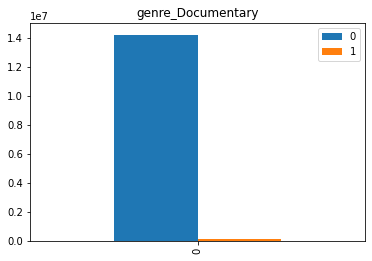

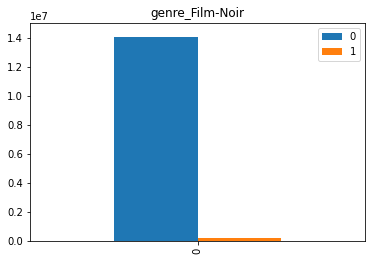

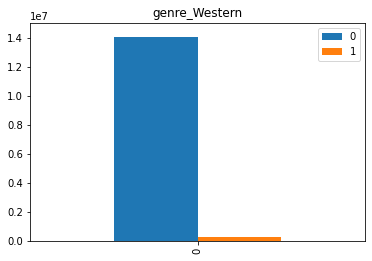

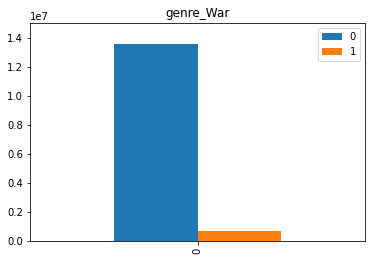

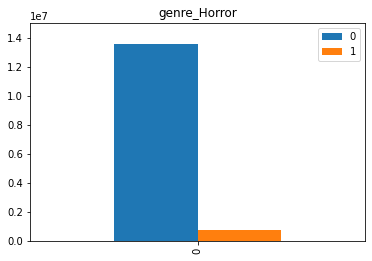

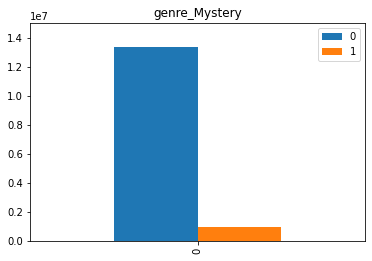

In [17]:
few_genre = list(genre_proportion.keys())[:6]

for genre_name in few_genre:
    pd.DataFrame(genre_dic[genre_name], index=[0]).plot(kind = 'bar')
    plt.ylim([0, 15000000])
    plt.title(genre_name)

### 영화들 중에 장르를 많이 포함하는 영화 찾기

In [18]:
len(df['title'].unique())

4967

In [19]:
df['title'].unique()

array(['Planet of the Apes (2001)', 'Secret Garden, The (1993)',
       'Aristocats, The (1970)', ..., 'Fun with Dick and Jane (1977)',
       'Anacondas: The Hunt for the Blood Orchid (2004)',
       'After Earth (2013)'], dtype=object)

#### 영화를 기준으로 groupby해서, 특정 영화가 train 데이터셋에서 출현한 빈도를 파악함

In [20]:
# 영화별로 포함하는 장르들 모두 찾기
df_genre = df.groupby(by="title")[genre_columns].apply(lambda x:x[x==1].count())

In [21]:
df_genre.head(1)

,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
title,,,,,,,,,,,,,,,,,,
'Salem's Lot (2004),0,0,0,0,0,0,0,78,0,0,78,0,78,0,0,78,0,0


In [22]:
df_genre

,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
title,,,,,,,,,,,,,,,,,,
'Salem's Lot (2004),0,0,0,0,0,0,0,78,0,0,78,0,78,0,0,78,0,0
"'burbs, The (1989)",0,0,0,0,573,0,0,0,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer (2009),0,0,0,0,6784,0,0,6784,0,0,0,0,0,6784,0,0,0,0
*batteries not included (1987),0,0,0,2725,2725,0,0,0,2725,0,0,0,0,0,2725,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,402,0,0,0,0,0,0,0,402,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC]² (2009),0,0,0,0,0,0,0,0,0,0,376,0,0,0,0,376,0,0
eXistenZ (1999),1194,0,0,0,0,0,0,0,0,0,0,0,0,0,1194,1194,0,0
xXx (2002),769,0,0,0,0,769,0,0,0,0,0,0,0,0,0,769,0,0


#### 영화별로 1개 이상의 장르를 포함하는데, 그렇다면 영화별로 장르를 얼마나 포함하는지 확인하자.
- 예를 들어 해리포터면 모험 장르, childern 장르 등 2개 이상을 포함할 수 있으니

In [23]:
temp = []
for movie_title in df_genre.index:
    cnt = 0
    for genre_name in genre_columns:
        if df_genre.loc[movie_title][genre_name] != 0:
            cnt += 1
    temp.append(cnt)

In [24]:
df_genre["cnt_genre"] = temp

- 확인해보니 최대 8개 장르를 포함하는 영화도 존재했다.
- 2개의 장르를 포함한 영화가 제일 많았다.
- 1개~3개의 장르를 포함하는 영화가 많다.

In [25]:
r = df_genre.groupby("cnt_genre").agg({"cnt_genre":"count"})
r

,cnt_genre
cnt_genre,
1,1149
2,1645
3,1372
4,586
5,178
6,32
7,4
8,1


#### 8개 장르를 포함하는 영화가 무엇인지 궁금해서 찾아봄

In [26]:
df_genre[df_genre["cnt_genre"] == 8]

,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,cnt_genre
title,,,,,,,,,,,,,,,,,,,
Patlabor: The Movie (Kidô keisatsu patorebâ: The Movie) (1989),62,0,62,0,0,62,0,62,0,62,0,0,62,0,62,62,0,0,8


#### 위에서 봤듯이, 여러 장르가 존재한다. 이러한 장르들 중에 실제로 존재하는 조합하는 뭐뭐가 있을지 확인해보기
- 예를 들어, 4개 장르를 포함하는 영화는 18개 장르 중 4개의 장르를 포함하므로, 18C4의 combination 중에 하나를 가진다.
    - 영화별로 이러한 장르 조합이 단 한개로 확정된다.
    - 이거를 새로운 장르로 볼 수 있다고 생각한다. 예시: "genre_Action genre_Animation genre_Crime genre_Drama"  -> 이런 융합적인 장르라고 볼 수 있다.
- 18개 중에 이러한 조합이 엄청 많을 것 같다고 생각이 들었다. 왜냐면 18C8만 하더라도 43758개이기 때문이다.
    - 그러나 679개만이 존재했다.
- 즉 6806개의 영화는 679개의 '세부 장르'로 구분할 수 있는 것이다.
- 이러한 '세부 장르'를 genre_list 라는 변수로 부르기로 함.

In [27]:
temp = []
for movie_title in df_genre.index:
    non_zero_genre_list = []
    for genre_name in genre_columns:
        if df_genre.loc[movie_title][genre_name] != 0:
            non_zero_genre_list.append(genre_name)
    non_zero_genre_list.sort()
    temp.append(" ".join(non_zero_genre_list))

In [28]:
genre_list = temp

In [29]:
temp[:3]

['genre_Drama genre_Horror genre_Mystery genre_Thriller',
 'genre_Comedy',
 'genre_Comedy genre_Drama genre_Romance']

In [30]:
df_genre["genre_list"] = temp

In [31]:
len(df_genre["genre_list"].unique())

679

#### genre_list 별로 몇 개의 영화를 포함하는지 count 통계를 진행해봤다.

In [32]:
genre_list_count = df_genre.groupby("genre_list").agg({"genre_list":"count"})
genre_list_count.rename(columns={"genre_list": "genre_list_count"}, inplace=True)
genre_list_count = genre_list_count.reset_index()

In [33]:
# 설명: genre_list별로 영화 수
sorted_genre_list_count = genre_list_count.sort_values(["genre_list_count"], ascending=False)

#### genre_list를 기준으로 count 통계를 진행해보니, genre_Drama, genre_Comedy를 제외하고는 단일 장르보다 2개 이상의 장르로 표현된 경우가 더 많은 것을 확인할 수 있었다.
- 따라서 특정 영화의 장르를, 단일 장르(1개 장르)로 표현하기보다 여러 장르의 조합으로 표현하는 것이 더 바람직할 수 있다고 생각이 들었다.

In [45]:
sorted_genre_list_count[-30:]

,genre_list,genre_list_count
168,genre_Action genre_Crime genre_Mystery,1
169,genre_Action genre_Crime genre_Mystery genre_R...,1
368,genre_Animation genre_Children genre_Fantasy g...,1
367,genre_Animation genre_Children genre_Fantasy g...,1
362,genre_Animation genre_Children genre_Drama gen...,1
389,genre_Animation genre_Fantasy genre_Horror gen...,1
391,genre_Animation genre_Fantasy genre_Mystery,1
418,genre_Children genre_Drama genre_Fantasy genre...,1
49,genre_Action genre_Adventure genre_Comedy genr...,1
417,genre_Children genre_Drama genre_Fantasy genre...,1


#### 단일 장르별로 genre_list를 얼마나 포함하는지 확인해봤다.
- 예를 들어, 679개의 genre_list 중에 "genre_Children"이라는 장르를 얼마나 포함하는지 확인해봤다.

In [35]:
dic_genre_name_freq = {}
for genre_name in genre_columns:
    tmp = []
    for genre_list_name in set(genre_list):
        if genre_name in genre_list_name and genre_name != genre_list_name:
            tmp.append(genre_list_name)
    dic_genre_name_freq[genre_name] = tmp

In [36]:
dic_genre_name_freq = dict(sorted(dic_genre_name_freq.items(), key=lambda x:len(x[1])))

#### EDA 초반부에 0과 1 중에서 1의 비율을 산정할 때, ['genre_Documentary', 'genre_Film-Noir', 'genre_Western', 'genre_War', 'genre_Horror', 'genre_Mystery'] -> 이 장르들의 비율이 적었고
- 단일 장르별 genre_list 수도 경향을 따르긴 했으나,
- "genre_Musical"이 의외로 적은 편이었다. == "genre_Musical"와 함께하는 장르가 상대적으로 적다는 뜻. == "genre_Musical"가 "genre_War"과 함께하기가 어려울 것으로 보이는데, 이와 같이, "genre_Musical"는 상대적으로 다른 장르들과 mix되기 어려운 장르 중에 하나라고 볼 수 있음.
- "genre_Mystery"는 전체 영화들 중에 차지하는 비율이 적은 편(6.5%)이었는데, "genre_Mystery"는 상대적으로 다른 장르들과 mix되기 쉬운 장르 중에 하나라고 볼 수 있음.

In [37]:
# 장르별로 장르를 포함하는 genre_list 개수
for key, value in dic_genre_name_freq.items():
    print(key, len(value))

genre_Documentary 10
genre_Film-Noir 28
genre_Western 47
genre_War 62
genre_Musical 71
genre_Horror 95
genre_Children 117
genre_Animation 123
genre_Mystery 123
genre_Crime 132
genre_Sci-Fi 149
genre_Romance 159
genre_Fantasy 174
genre_Thriller 213
genre_Adventure 214
genre_Action 228
genre_Comedy 244
genre_Drama 266


In [38]:
genre_list

['genre_Drama genre_Horror genre_Mystery genre_Thriller',
 'genre_Comedy',
 'genre_Comedy genre_Drama genre_Romance',
 'genre_Children genre_Comedy genre_Fantasy genre_Sci-Fi',
 'genre_Drama genre_Thriller',
 'genre_Comedy genre_Romance',
 'genre_Comedy genre_Drama genre_Romance',
 'genre_Crime genre_Drama genre_Thriller',
 'genre_Comedy genre_Romance',
 'genre_Adventure genre_Romance genre_Thriller',
 'genre_Comedy genre_Romance',
 'genre_Adventure genre_Children genre_Comedy',
 'genre_Adventure genre_Animation genre_Children',
 'genre_Children genre_Comedy',
 'genre_Adventure genre_Comedy genre_Fantasy',
 'genre_Drama',
 'genre_Crime genre_Drama genre_Thriller genre_War',
 'genre_Drama',
 'genre_Crime genre_Drama',
 'genre_Drama',
 'genre_Adventure genre_Drama genre_Thriller',
 'genre_Thriller',
 'genre_Action',
 'genre_Horror',
 'genre_Comedy genre_Fantasy genre_Romance',
 'genre_Film-Noir genre_Thriller',
 'genre_Action genre_Adventure genre_Fantasy',
 'genre_Drama genre_Horror gen

#### 구했던 genre_list를 통해, 단일 장르를 기준으로 어떤 장르들과 얼마나 함께했는지 파악하기
- "Drama"라는 장르를 포함하는 genre_list가 "genre_Drama genre_Action genre_War", "genre_Drama genre_Action" 이렇게 2가지만 있을 경우:
- "Drama" 장르가 "Action"이라는 장르와는 2번, "War"이라는 장르와는 1번 함께 한 것을 의미.
- 이를 통해, 특정 장르가 다른 장르랑 유사한지 빈도를 기반으로 파악이 가능할 것 같았음.

In [39]:
dic_genre_interaction_genre = {}
for genre_name in genre_columns:
    tmp = []
    for genre_list in dic_genre_name_freq[genre_name]:
        for g_l in genre_list.split():
            # 같은 장르인 경우 제외
            if g_l != genre_name:
                tmp.append(g_l[6:])
    dic_genre_interaction_genre[genre_name] = dict(sorted(Counter(tmp).items(), key=lambda x:x[1], reverse=True))

#### 아래 결과를 해석해보자면, Action이라는 장르는 빈도를 기준으로는 Adventure와 Thriller와 함께 등장하는 경우가 많은 것을 알 수 있다.

In [40]:
topk = 2
for genre_name, info in dic_genre_interaction_genre.items():
    print(f"############{genre_name}############")
    for i, (key, value) in enumerate(info.items()):
        if i == topk:
            break
        print(key, value)

############genre_Action############
Adventure 95
Thriller 88
############genre_Adventure############
Action 95
Comedy 84
############genre_Animation############
Children 59
Adventure 56
############genre_Children############
Adventure 60
Animation 59
############genre_Comedy############
Adventure 84
Action 73
############genre_Crime############
Thriller 65
Drama 59
############genre_Documentary############
Comedy 3
Drama 3
############genre_Drama############
Thriller 96
Romance 75
############genre_Fantasy############
Adventure 66
Comedy 66
############genre_Film-Noir############
Crime 15
Drama 15
############genre_Horror############
Thriller 52
Drama 33
############genre_Musical############
Comedy 40
Children 28
############genre_Mystery############
Thriller 62
Drama 54
############genre_Romance############
Drama 75
Comedy 65
############genre_Sci-Fi############
Action 60
Thriller 55
############genre_Thriller############
Drama 96
Action 88
############genre_War############
Drama 36


#### 빈도가 아닌 자카드 유사도로 확인해보기
- 자카드 유사도로 파악하면, 비율을 알 수 있기 때문에 다른 장르들보다 유독 함께 등장하는 장르를 확인해볼 수 있다.

In [41]:
dic_genre_name_freq

{'genre_Documentary': ['genre_Comedy genre_Documentary',
  'genre_Documentary genre_Fantasy',
  'genre_Comedy genre_Documentary genre_Drama',
  'genre_Documentary genre_War',
  'genre_Action genre_Documentary genre_Drama genre_Thriller',
  'genre_Documentary genre_Drama',
  'genre_Crime genre_Documentary',
  'genre_Documentary genre_Mystery',
  'genre_Documentary genre_Musical',
  'genre_Action genre_Comedy genre_Documentary'],
 'genre_Film-Noir': ['genre_Crime genre_Film-Noir genre_Mystery',
  'genre_Crime genre_Drama genre_Film-Noir',
  'genre_Action genre_Animation genre_Crime genre_Drama genre_Film-Noir genre_Mystery genre_Sci-Fi genre_Thriller',
  'genre_Drama genre_Film-Noir genre_Romance',
  'genre_Crime genre_Drama genre_Film-Noir genre_Romance genre_Thriller',
  'genre_Crime genre_Film-Noir genre_Mystery genre_Thriller',
  'genre_Drama genre_Film-Noir genre_Mystery genre_Thriller',
  'genre_Film-Noir genre_Romance genre_Thriller',
  'genre_Crime genre_Film-Noir genre_Romance',

In [42]:
dic_genre_interaction_genre_jaccard = {}
for genre_name in genre_columns:
    tmp = []
    for genre_list in dic_genre_name_freq[genre_name]:
        for g_l in genre_list.split():
            # 같은 장르인 경우 제외
            if g_l != genre_name:
                tmp.append(g_l[6:])
    Counter_tmp = Counter(tmp)
    union = sum(value for key, value in Counter_tmp.items())
    for key, value in Counter_tmp.items():
        Counter_tmp[key] /= union
    dic_genre_interaction_genre_jaccard[genre_name] = dict(sorted(Counter_tmp.items(), key=lambda x:x[1], reverse=True))

#### 아래의 결과를 보니, 특정 장르와 다른 장르랑 유독 비율이 높은 경우가 존재하긴 했으나, 기준이 되는 장르의 빈도 자체가 적은 것을 감안하면 무의미한 결과일 수 있다.
- "genre_Documentary"는 "Drama", "Comedy"와 함꼐하는 경우가 많다. 그러나 "genre_Documentary" 자체가 빈도가 적어서 관련이 크다고 해석하는 것은 잘못된 해석일 수 있다.

In [43]:
topk = 2
for genre_name, info in dic_genre_interaction_genre_jaccard.items():
    print(f"############{genre_name}############")
    for i, (key, value) in enumerate(info.items()):
        if i == topk + 1:
            break
        if genre_name[6:] != key:
            print(key, value)

############genre_Action############
Adventure 0.13590844062947066
Thriller 0.12589413447782546
Comedy 0.1044349070100143
############genre_Adventure############
Action 0.14032496307237813
Comedy 0.1240768094534712
Fantasy 0.09748892171344166
############genre_Animation############
Children 0.14532019704433496
Adventure 0.13793103448275862
Comedy 0.12561576354679804
############genre_Children############
Adventure 0.16
Animation 0.15733333333333333
Comedy 0.14133333333333334
############genre_Comedy############
Adventure 0.11618257261410789
Action 0.10096818810511757
Drama 0.0954356846473029
############genre_Crime############
Thriller 0.16209476309226933
Drama 0.14713216957605985
Action 0.13466334164588528
############genre_Documentary############
Comedy 0.21428571428571427
Drama 0.21428571428571427
Action 0.14285714285714285
############genre_Drama############
Thriller 0.12323491655969192
Romance 0.0962772785622593
Action 0.08985879332477535
############genre_Fantasy############
Adve